# Activity 2: Solution

You have built a multiple linear regression model to predict box office revenues using two variables: advertising spending and number of theatres. 

### Data exploration

Read in the data and make scatter plots between the predictors and the response. 

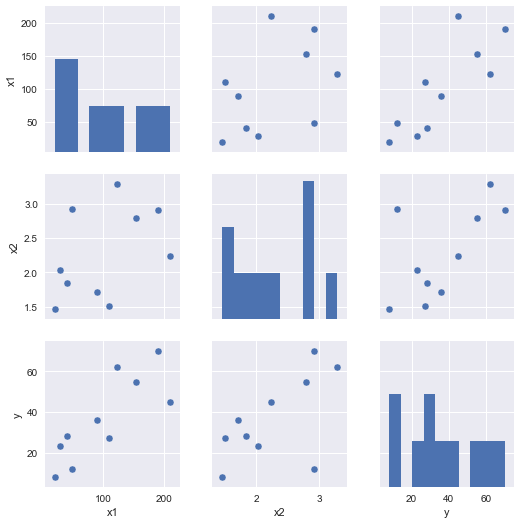

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make the data
#y are box office revenues, x1: advertising,x2: number of theaters  
#All variables are expressed in 000s
#Linear regression accepts Pandas DataFrame 
d = {"y":[23,12,36,27,45,70,55,8,62,28],
     "x1":[29,49,89,110,210,190,153,20,122,41],
     "x2": [2.036,2.919,1.707,1.505,2.232,2.910,2.795,1.46,3.288,1.838]
    }
data = pd.DataFrame(data = d)

#To make a scatter plot of all predictors and response, you can use the seaborn package
import seaborn as sea 
sea.pairplot(data)
plt.show()

The seaborn pairplot gives you a lot of information. It shows you the scatterplots between all pairs of variables. If we have a look at the third row, we can see the correlation between the response (y) and x1 and x2. The linear relationship is clear in bot predictors. However, the positive trend is more clear in x1 (advertising) than in x2 (number of theatres). We can also spot whether there is correlation between the predictors (row 1, column 2 and row 2, column 1). From those scatters, there seems to be little correlation between x1 and x2. To be sure about the correlation between x1 and x2, make a correlation matrix.

In [49]:
#In pandas, correlation can be calculated fairly easy
#By default the pearson correlation is calculated
data.corr()

,x1,x2,y
x1,1.000000,0.436513,0.814852
x2,0.436513,1.000000,0.628218
y,0.814852,0.628218,1.000000


Correlation between advertising and number of theatres is low: 0.44. However, there is a tendency that the higher the advertising spending, the higher the number of theatres and vice versa. In this case, the correlation is not problematic. However, you should be aware that the positive effect of the number of theatres may be partially caused by advertising, and the other way around. We also see that the correlation between x1 and x2 and y are bigger than 0.50, which is good since we want to perform regression.

### Simple linear regression

Now let's look at building a simple linear regression model for advertising and number of theatres. We use the *statsmodels* package since we are interested in interpretation. Since we are are not making any predictions, we don't make a train/test split. 

In [50]:
import statsmodels.api as sm

#Add a constant
data_const = sm.add_constant(data)

#Fit an OLS for advertising
lm_ads = sm.OLS(data_const["y"],data_const[["const","x1"]]).fit()
print(lm_ads.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Wed, 21 Aug 2019   Prob (F-statistic):            0.00408
Time:                        10:56:28   Log-Likelihood:                -38.624
No. Observations:                  10   AIC:                             81.25
Df Residuals:                       8   BIC:                             81.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0657      7.603      1.455      0.1

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [51]:
#Fit an OLS for number of theaters
lm_theaters = sm.OLS(data_const["y"],data_const[["const","x2"]]).fit()
print(lm_theaters.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     5.216
Date:                Wed, 21 Aug 2019   Prob (F-statistic):             0.0518
Time:                        10:56:28   Log-Likelihood:                -41.567
No. Observations:                  10   AIC:                             87.13
Df Residuals:                       8   BIC:                             87.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4790     20.481     -0.414      0.6

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


We see that the *lm_ads* model has more explanatory power than the *lm_theaters* model (high R-squared). Also the number of theatres is only significant on the 10% significance level.

### Multiple linear regression

Build one multiple linear regression model with two predictors: advertising and number of theatres.

In [52]:
#Function that fits an OLS for advertising and theaters.
#This is done in exactly the same fashion as SLR
def make_mlr(data, xvars, yvars):
    
    ### BEGIN SOLUTION
    lm = sm.OLS(data[yvars], data[xvars]).fit()
    ### END SOLUTION
    
    return lm

Verify your answers:

In [53]:
lm_full = make_mlr(data_const,["const","x1","x2"], "y")
print(lm_full.summary())

assert np.allclose(lm_full.params, (-8.48785663,0.20660479,10.64733005))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     10.83
Date:                Wed, 21 Aug 2019   Prob (F-statistic):            0.00720
Time:                        10:56:33   Log-Likelihood:                -37.029
No. Observations:                  10   AIC:                             80.06
Df Residuals:                       7   BIC:                             80.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4879     13.908     -0.610      0.5

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


**Coefficients**
- We see that x1 (advertising) is significant at the 5% signifance level. If the advertising spending increases with 1 unit (or 1000 Sterling) this implies that the box office revenues would increase on average with 0.2066 (or 206.6 Sterling), while keeping the number of theatres constant. 
- We see that x2 (number of theatres) is not significant. In the SLR model it was still partially significant (p-value: 0.052), why? This is because advertising and number of theatres are correlated. In the SLR, the effect of number of theatres is actually not due to the number of theatres. It is because producers are spending more money on advertising that more theatres are playing the film, which is driving box office sales. In the SLR model, the number of theatres is getting credit for the effect of advertising on box office sales. 

**Performance**
- The model performance of the MLR model is better than the two seperate models in terms of R-squared (0.76 vs 0.66 and 0.40). However, when comparing models, it is better to look at the adjusted R-squared since this corrects the R-squared for adding extra variables. When we look at the adjusted R-squared, we see that the MLR model improves model performance. However the difference with the SLR model on advertising is small (0.68 vs 0.62) 
- The F-test is significant (p-value: 0.007), so this tells us that at least 1 of the predictors is related to the response (advertising in this case).

**Assumptions**
- The linear relationship betwen predictors and response is already tested by the pair plots in the data exploration part.
- Multicollinearity is also tested in the data exploration part. We saw that the correlation between advertising and number of theatres was 0.44 which is smaller than 0.80. However, a better way is to calculate the VIF (variance inflation factor). The VIFs of the predictors are low (below 4), only the VIF of the intercept is high. We are only interested in the VIF of the predictors, so a large VIF for the intercept is not problematic.


In [39]:
#Use the variance inflation factor from the statsmodels package
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Extract the predictors and calculate the VIFs
variables = lm_full.model.exog

#Make a function that calculates the VIFs
#You should return a pd Data Frame with two columns: the VIF values and the predictors name. 
def calculate_vif(variables):
    
    ### BEGIN SOLUTION
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Predictor"] = lm_full.model.exog_names
    ### END SOLUTION
    
    return vif

Verify your results:


In [38]:
vifs = calculate_vif(variables)
print(vifs)

assert np.allclose(vifs["VIF"],(14.054124,1.235397,1.235397))

         VIF Predictor
0  14.054124     const
1   1.235397        x1
2   1.235397        x2


- Multivariate normality can be tested in a couple of ways. First, the histograms in the data exploration phase did not really show a normal distribution. Second, we can make a QQ-plot of the residuals. We see that the blue dots are not exactly on the red line, which is also an indication of no normal distribution. Finally, we can perform a normality test such as a Kolmogorov–Smirnov test. This test has as a null hypothesis that the data is normally distributed. We see that the p-value of the K-S test is 0.0009 thereby rejecting the null hypothesis of a normal distribution. To mitigate this problem, we could do variable transformations like a log transformation. However, in this case, we only have 10 observations, so gathering more obsverations might be a good solution. 

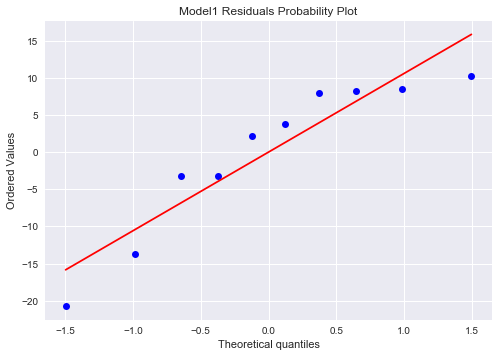

KstestResult(statistic=0.58291403261470309, pvalue=0.00093189328803822136)

In [40]:
#Make a QQ-plot of the residuals
from scipy import stats

stats.probplot(lm_full.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")
plt.show()

#Do a K-S test
stats.kstest(lm_full.resid, 'norm')

- Autocorrelation can be tested with the Durbin-Watson test. The D-B test statistic can be seen in the output of MLR. Values between 1.5 and 2.5 are often seen as normal and serve as an indication for no autocorrelation problem.
- Finally, we want to test for heteroscedasticity. This can be tested by making a residual plot, which plots the residuals against the fitted values. If there is no pattern in the residuals, then there is no heteroscedasticity. From the residual plot, we cannot detect a funnel shape.

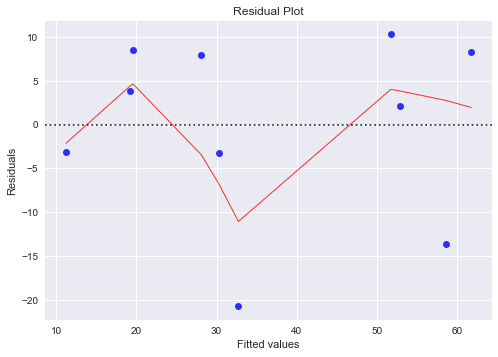

In [41]:
#Make a residual plot with the seaborn package
#Lowess adds a scatter smoother
plot_resid = sea.residplot(lm_full.fittedvalues, 'y', data=data_const, 
                          lowess=True, 
                          scatter_kws={'color': 'blue'}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_resid.axes.set_title('Residual Plot')
plot_resid.axes.set_xlabel('Fitted values')
plot_resid.axes.set_ylabel('Residuals')

plt.show()